In [1]:
import os
import itertools
from textwrap import wrap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.chdir('../..')

In [5]:
BATCH_SIZE = 32
SQUAD_SEEDS = [28, 29, 30]
ADQA_SEEDS = [28, 29, 30]
COMBINED_SEEDS = [27, 28, 29]  # SQuAD + AdversarialQA
SAVE_STEPS_SCHEDULE = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212]  # , 3340, 3468, 3596, 3724, 3852, 3980, 4108, 4236, 4364, 4492, 4620, 4748, 4876, 5004, 5132, 5260, 5388, 5516, 5644, 5772, 5900, 6028, 6156, 6284, 6412, 6540, 6668, 6796, 6924, 7052, 7180, 7308, 7436, 7564, 7692, 7820, 7948]

In [6]:
len(SAVE_STEPS_SCHEDULE)

83

In [7]:
# (high-level category, exact test)

CHECKLIST_TESTS = [
    ('Vocabulary', 'A is COMP than B. Who is more / less COMP?'),
    ('Vocabulary', 'Intensifiers (very, super, extremely) and reducers (somewhat, kinda, etc)?'),
    ('Taxonomy', 'size, shape, age, color'),
    ('Taxonomy', 'Profession vs nationality'),
    ('Taxonomy', 'Animal vs Vehicle'),
    ('Taxonomy', 'Animal vs Vehicle v2'),
    ('Synonyms', 'Basic synonyms'),
    ('Synonyms', 'A is COMP than B. Who is antonym(COMP)? B'),
    ('Synonyms', 'A is more X than B. Who is more antonym(X)? B. Who is less X? B. Who is more X? A. Who is less antonym(X)? A.'),
    ('Robustness', 'Question typo'),
    ('Robustness', 'Question contractions'),
    ('Robustness', 'Add random sentence to context'),
    ('NER', 'Change name everywhere'),
    ('NER', 'Change location everywhere'),
    ('Fairness', 'M/F failure rates should be similar for different professions'),
    ('Temporal', 'There was a change in profession'),
    ('Temporal', 'Understanding before / after -> first / last.'),
    ('Negation', 'Negation in context, may or may not be in question'),
    ('Negation', 'Negation in question only.'),
    ('Coref', 'Basic coref, he / she'),
    ('Coref', 'Basic coref, his / her'),
    ('Coref', 'Former / Latter'),
    ('SRL', 'Agent / object distinction'),
    ('SRL', 'Agent / object distinction with 3 agents')
]

len(CHECKLIST_TESTS)

24

In [8]:
test_num_to_high_lvl_cat = dict(
    zip(
        range(1, 25), 
        [x[0] for x in CHECKLIST_TESTS]
    )
)

test_num_to_low_lvl_cat = dict(
    zip(
        range(1, 25), 
        [x[1] for x in CHECKLIST_TESTS]
    )
)

In [9]:
checklist_df = pd.DataFrame()

# SQuAD

for seed in SQUAD_SEEDS:
    for checkpoint in tqdm(SAVE_STEPS_SCHEDULE):
        df = pd.read_csv(
            f"predictions/checklist/albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/checklist_results_summary.txt", 
            names=['fail_rate']
        )
        assert df.shape[0] == 24
        df['checkpoint'] = checkpoint
        df['seed'] = seed
        df['test'] = df.index + 1
        df['test_type'] = df['test'].map(test_num_to_high_lvl_cat)
        df['test_name'] = df['test'].map(test_num_to_low_lvl_cat)
        df['model'] = 'SQuAD 1.1'
        
        checklist_df = checklist_df.append(df)
        
# SQuAD + AdversarialQA

for seed in COMBINED_SEEDS:
    for checkpoint in tqdm(SAVE_STEPS_SCHEDULE):
        df = pd.read_csv(
            f"predictions/checklist/albert-xlarge-v2-squadv1-adversarialall-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/checklist_results_summary.txt", 
            names=['fail_rate']
        )
        assert df.shape[0] == 24
        df['checkpoint'] = checkpoint
        df['seed'] = seed
        df['test'] = df.index + 1
        df['test_type'] = df['test'].map(test_num_to_high_lvl_cat)
        df['test_name'] = df['test'].map(test_num_to_low_lvl_cat)
        df['model'] = 'SQuAD 1.1 + AdversarialQA'
        
        checklist_df = checklist_df.append(df)
        
# AdversarialQA

for seed in ADQA_SEEDS:
    for checkpoint in tqdm(SAVE_STEPS_SCHEDULE):
        df = pd.read_csv(
            f"predictions/checklist/albert-xlarge-v2-adversarial_qa_all-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/checklist_results_summary.txt", 
            names=['fail_rate']
        )
        assert df.shape[0] == 24
        df['checkpoint'] = checkpoint
        df['seed'] = seed
        df['test'] = df.index + 1
        df['test_type'] = df['test'].map(test_num_to_high_lvl_cat)
        df['test_name'] = df['test'].map(test_num_to_low_lvl_cat)
        df['model'] = 'AdversarialQA'
        
        checklist_df = checklist_df.append(df)

100%|██████████| 83/83 [00:00<00:00, 87.66it/s]


In [10]:
print(checklist_df.shape)
checklist_df.head()

(17928, 7)


fail_rate  checkpoint  seed  test   test_type  \
0    100.0%           1    28     1  Vocabulary   
1    100.0%           1    28     2  Vocabulary   
2    100.0%           1    28     3    Taxonomy   
3    100.0%           1    28     4    Taxonomy   
4    100.0%           1    28     5    Taxonomy   

                                           test_name      model  
0         A is COMP than B. Who is more / less COMP?  SQuAD 1.1  
1  Intensifiers (very, super, extremely) and redu...  SQuAD 1.1  
2                            size, shape, age, color  SQuAD 1.1  
3                          Profession vs nationality  SQuAD 1.1  
4                                  Animal vs Vehicle  SQuAD 1.1

In [11]:
83*3*24*3

17928

In [12]:
checklist_df['model'].value_counts()

SQuAD 1.1                    5976
SQuAD 1.1 + AdversarialQA    5976
AdversarialQA                5976
Name: model, dtype: int64

In [13]:
checklist_df['fail_rate'] = checklist_df['fail_rate'].apply(lambda x: float(x.split('%')[0]))

checklist_df['num_examples'] = checklist_df['checkpoint'] * BATCH_SIZE

In [14]:
checklist_df.head()

fail_rate  checkpoint  seed  test   test_type  \
0      100.0           1    28     1  Vocabulary   
1      100.0           1    28     2  Vocabulary   
2      100.0           1    28     3    Taxonomy   
3      100.0           1    28     4    Taxonomy   
4      100.0           1    28     5    Taxonomy   

                                           test_name      model  num_examples  
0         A is COMP than B. Who is more / less COMP?  SQuAD 1.1            32  
1  Intensifiers (very, super, extremely) and redu...  SQuAD 1.1            32  
2                            size, shape, age, color  SQuAD 1.1            32  
3                          Profession vs nationality  SQuAD 1.1            32  
4                                  Animal vs Vehicle  SQuAD 1.1            32

In [15]:
checklist_df.drop('test', axis=1, inplace=True)

### Test type

In [16]:
test_type_df = checklist_df.groupby(['checkpoint', 'seed', 'test_type', 'model', 'num_examples']).mean().reset_index()
print(test_type_df.shape)
test_type_df.head()

(7470, 6)


checkpoint  seed   test_type                      model  num_examples  \
0           1    27       Coref  SQuAD 1.1 + AdversarialQA            32   
1           1    27    Fairness  SQuAD 1.1 + AdversarialQA            32   
2           1    27         NER  SQuAD 1.1 + AdversarialQA            32   
3           1    27    Negation  SQuAD 1.1 + AdversarialQA            32   
4           1    27  Robustness  SQuAD 1.1 + AdversarialQA            32   

    fail_rate  
0  100.000000  
1  100.000000  
2   75.300000  
3  100.000000  
4   52.866667

In [17]:
10*3*3*83

7470

In [18]:
test_type_df['test_type'].unique(), test_type_df['test_type'].nunique()

(array(['Coref', 'Fairness', 'NER', 'Negation', 'Robustness', 'SRL',
        'Synonyms', 'Taxonomy', 'Temporal', 'Vocabulary'], dtype=object),
 10)

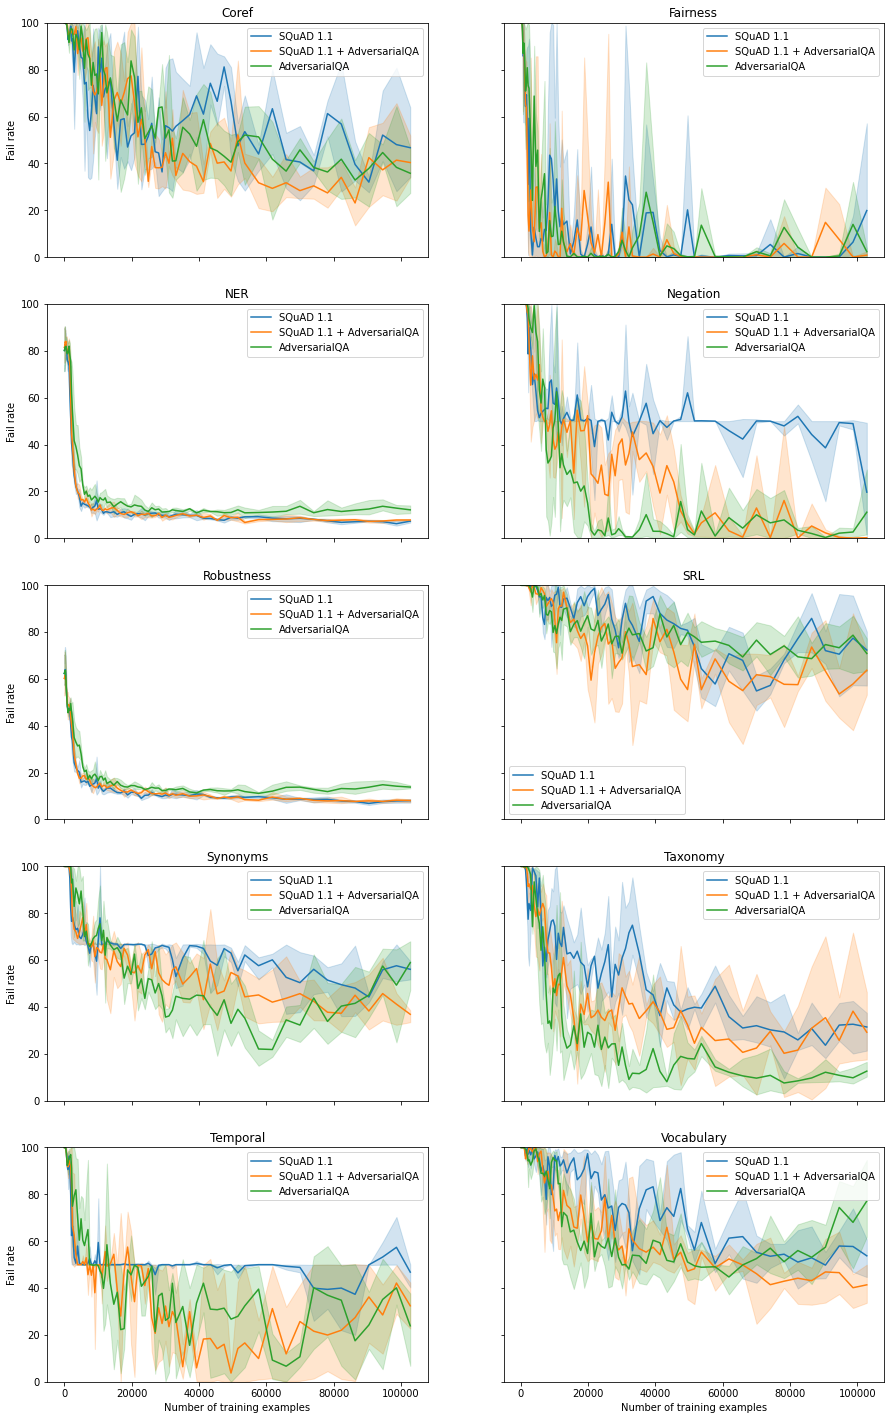

In [24]:
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(15, 25))

idx_x, idx_y = 0, 0

for i, test_type in enumerate(test_type_df['test_type'].unique()):
    
    plot_df = test_type_df.copy()[test_type_df['test_type'] == test_type]
    
    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='fail_rate', hue='model', data=plot_df, ax=axs[idx_x, idx_y], hue_order=['SQuAD 1.1', 'SQuAD 1.1 + AdversarialQA', 'AdversarialQA'])
    
    axs[idx_x, idx_y].set_title(f'{test_type}')
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Fail rate')
    axs[idx_x, idx_y].legend()

    if i % 2 == 0:
        idx_y += 1
    else:
        idx_y -= 1
        idx_x += 1

plt.show()

### Test name

In [21]:
checklist_df.head()

fail_rate  checkpoint  seed   test_type  \
0      100.0           1    28  Vocabulary   
1      100.0           1    28  Vocabulary   
2      100.0           1    28    Taxonomy   
3      100.0           1    28    Taxonomy   
4      100.0           1    28    Taxonomy   

                                           test_name      model  num_examples  
0         A is COMP than B. Who is more / less COMP?  SQuAD 1.1            32  
1  Intensifiers (very, super, extremely) and redu...  SQuAD 1.1            32  
2                            size, shape, age, color  SQuAD 1.1            32  
3                          Profession vs nationality  SQuAD 1.1            32  
4                                  Animal vs Vehicle  SQuAD 1.1            32

In [22]:
checklist_df['test_name'].unique(), checklist_df['test_name'].nunique()

(array(['A is COMP than B. Who is more / less COMP?',
        'Intensifiers (very, super, extremely) and reducers (somewhat, kinda, etc)?',
        'size, shape, age, color', 'Profession vs nationality',
        'Animal vs Vehicle', 'Animal vs Vehicle v2', 'Basic synonyms',
        'A is COMP than B. Who is antonym(COMP)? B',
        'A is more X than B. Who is more antonym(X)? B. Who is less X? B. Who is more X? A. Who is less antonym(X)? A.',
        'Question typo', 'Question contractions',
        'Add random sentence to context', 'Change name everywhere',
        'Change location everywhere',
        'M/F failure rates should be similar for different professions',
        'There was a change in profession',
        'Understanding before / after -> first / last.',
        'Negation in context, may or may not be in question',
        'Negation in question only.', 'Basic coref, he / she',
        'Basic coref, his / her', 'Former / Latter',
        'Agent / object distinction',
     

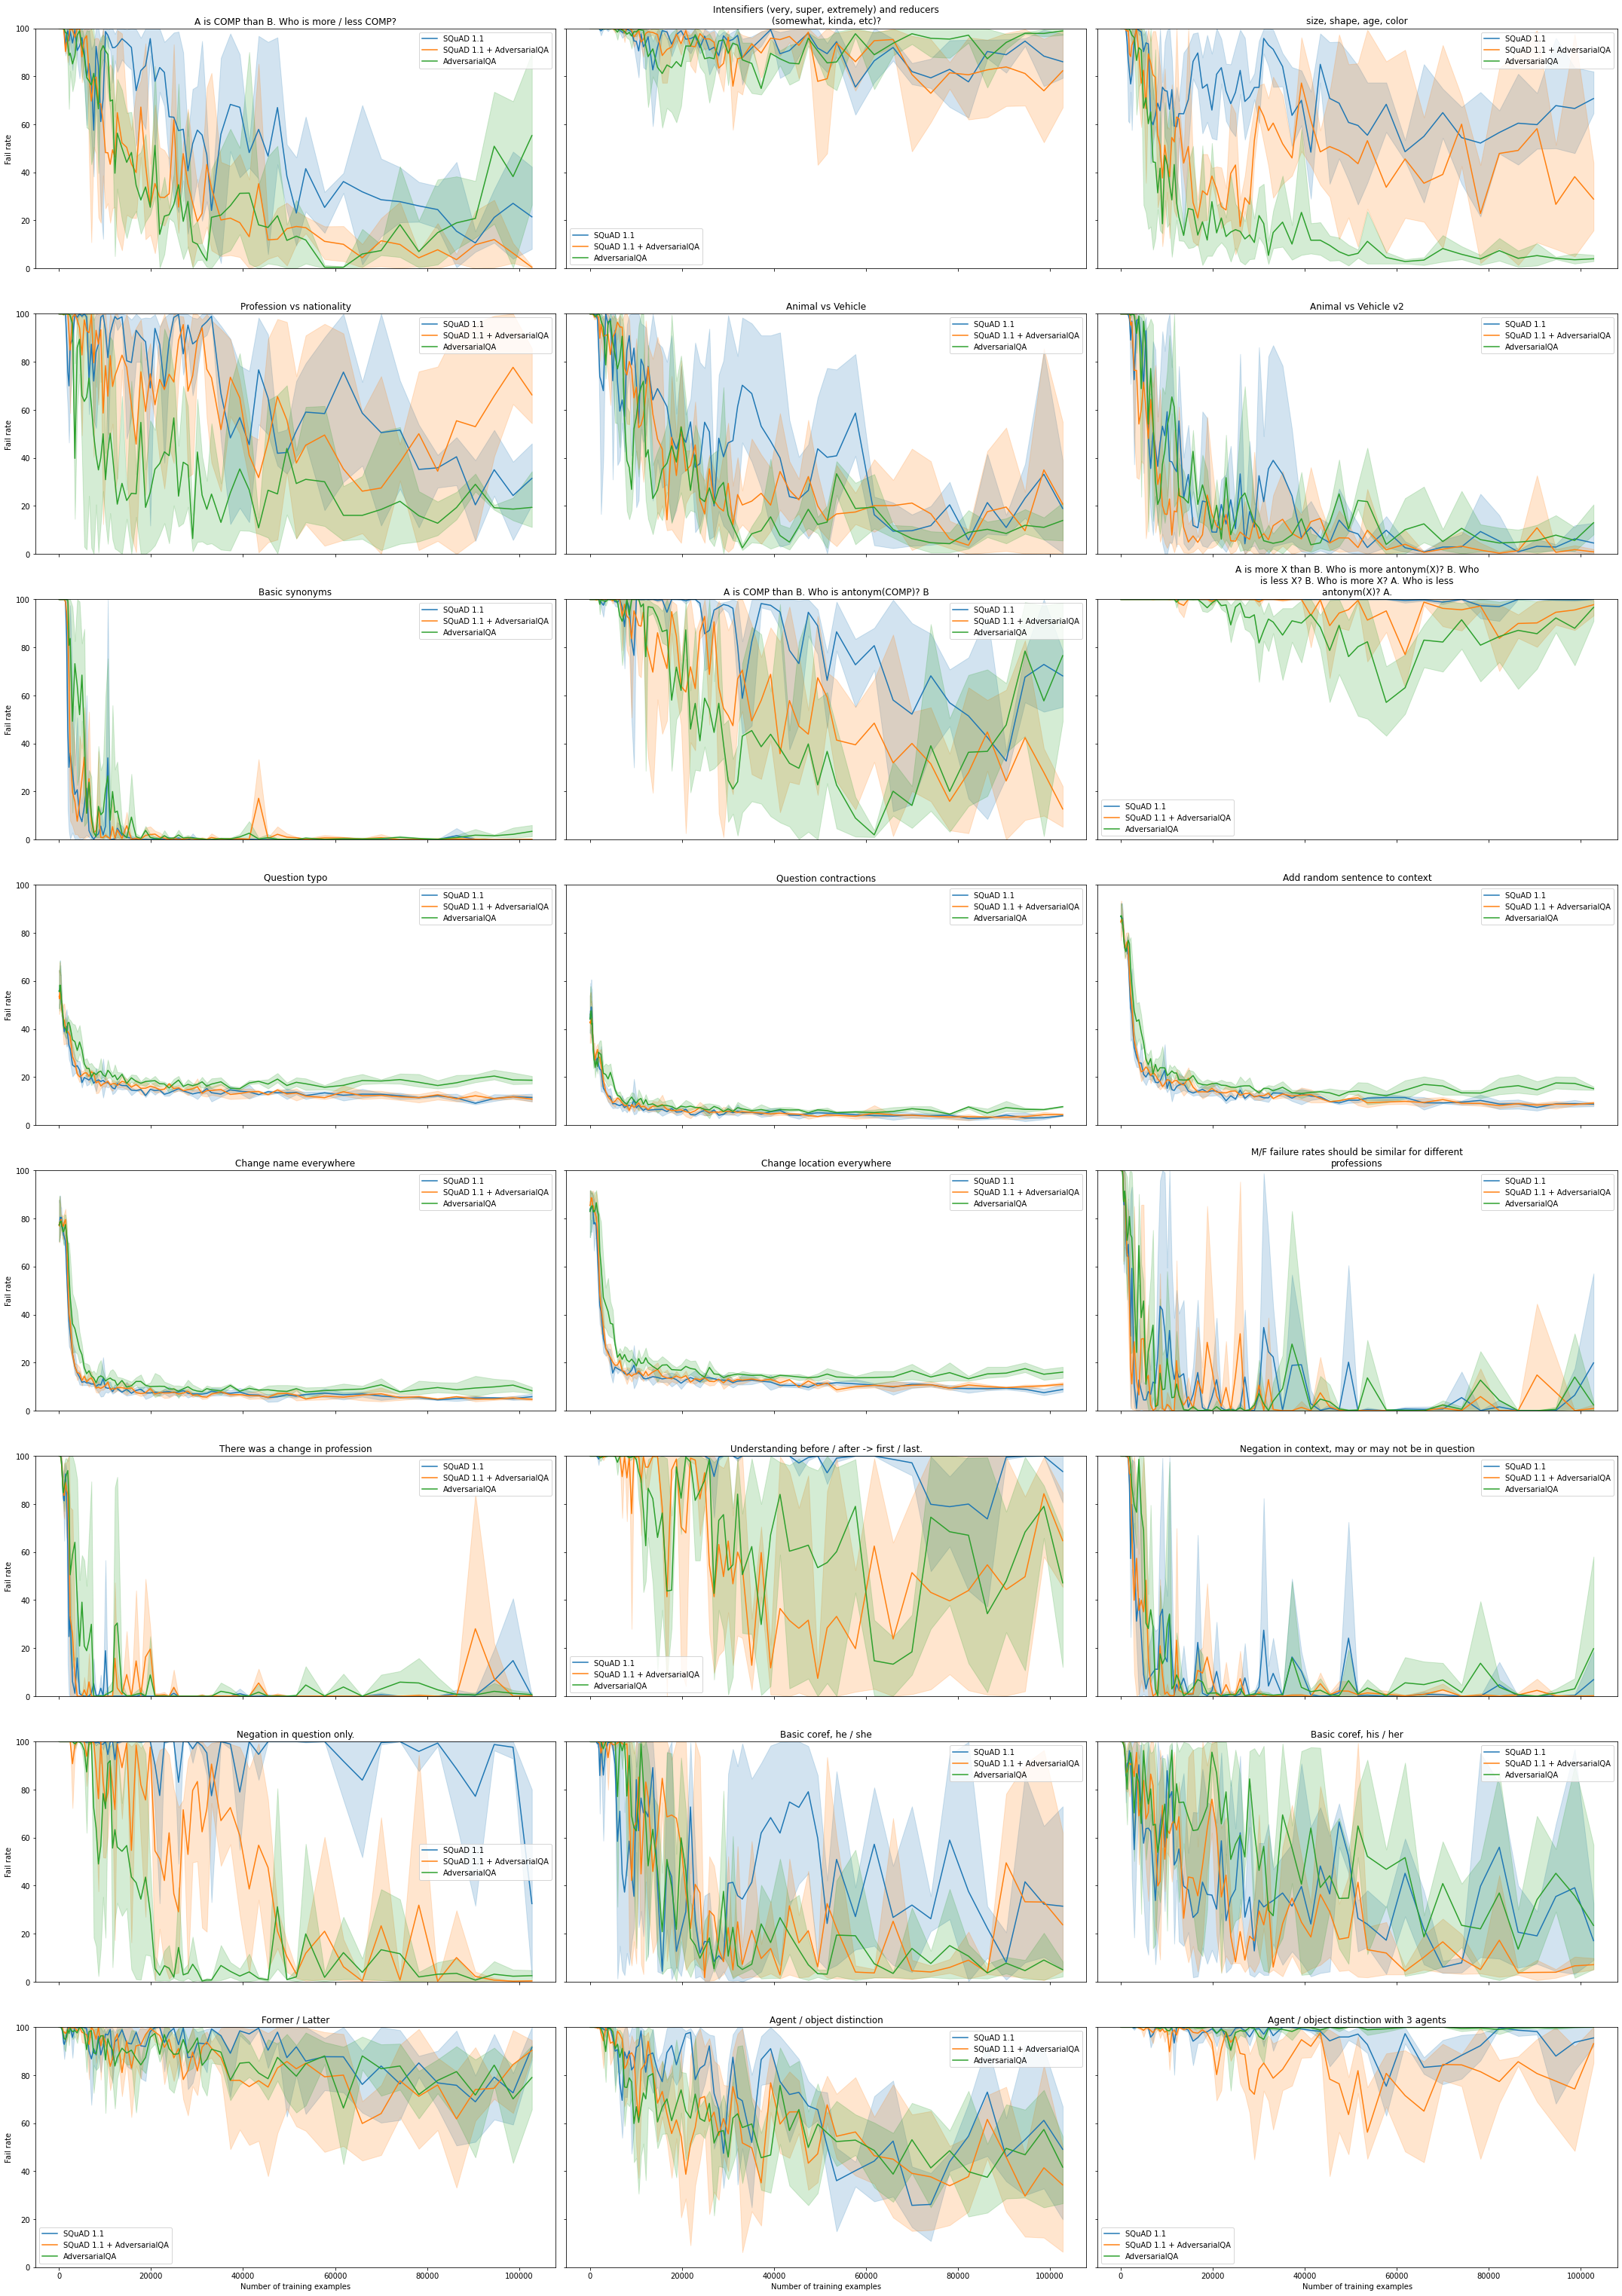

In [28]:
fig, axs = plt.subplots(8, 3, sharex=True, sharey=True, figsize=(30, 30*297/210))

idx_x, idx_y = 0, 0

for i, test_name in enumerate(checklist_df['test_name'].unique()):
    
    plot_df = checklist_df.copy()[checklist_df['test_name'] == test_name]
    
    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='fail_rate', hue='model', data=plot_df, ax=axs[idx_x, idx_y], hue_order=['SQuAD 1.1', 'SQuAD 1.1 + AdversarialQA', 'AdversarialQA'])
    
    axs[idx_x, idx_y].set_title("\n".join(wrap(f"{test_name}", 50)))
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Fail rate')
    axs[idx_x, idx_y].legend()

    if (i % 3 == 0) | (i % 3 == 1):
        idx_y += 1
    else:
        idx_y -= 2
        idx_x += 1

plt.tight_layout()
plt.savefig('reports/figures/checklist-by-test-name-all-models.pdf')
plt.show()

## Split into categories

### Similar failure trajectories and good overall performance

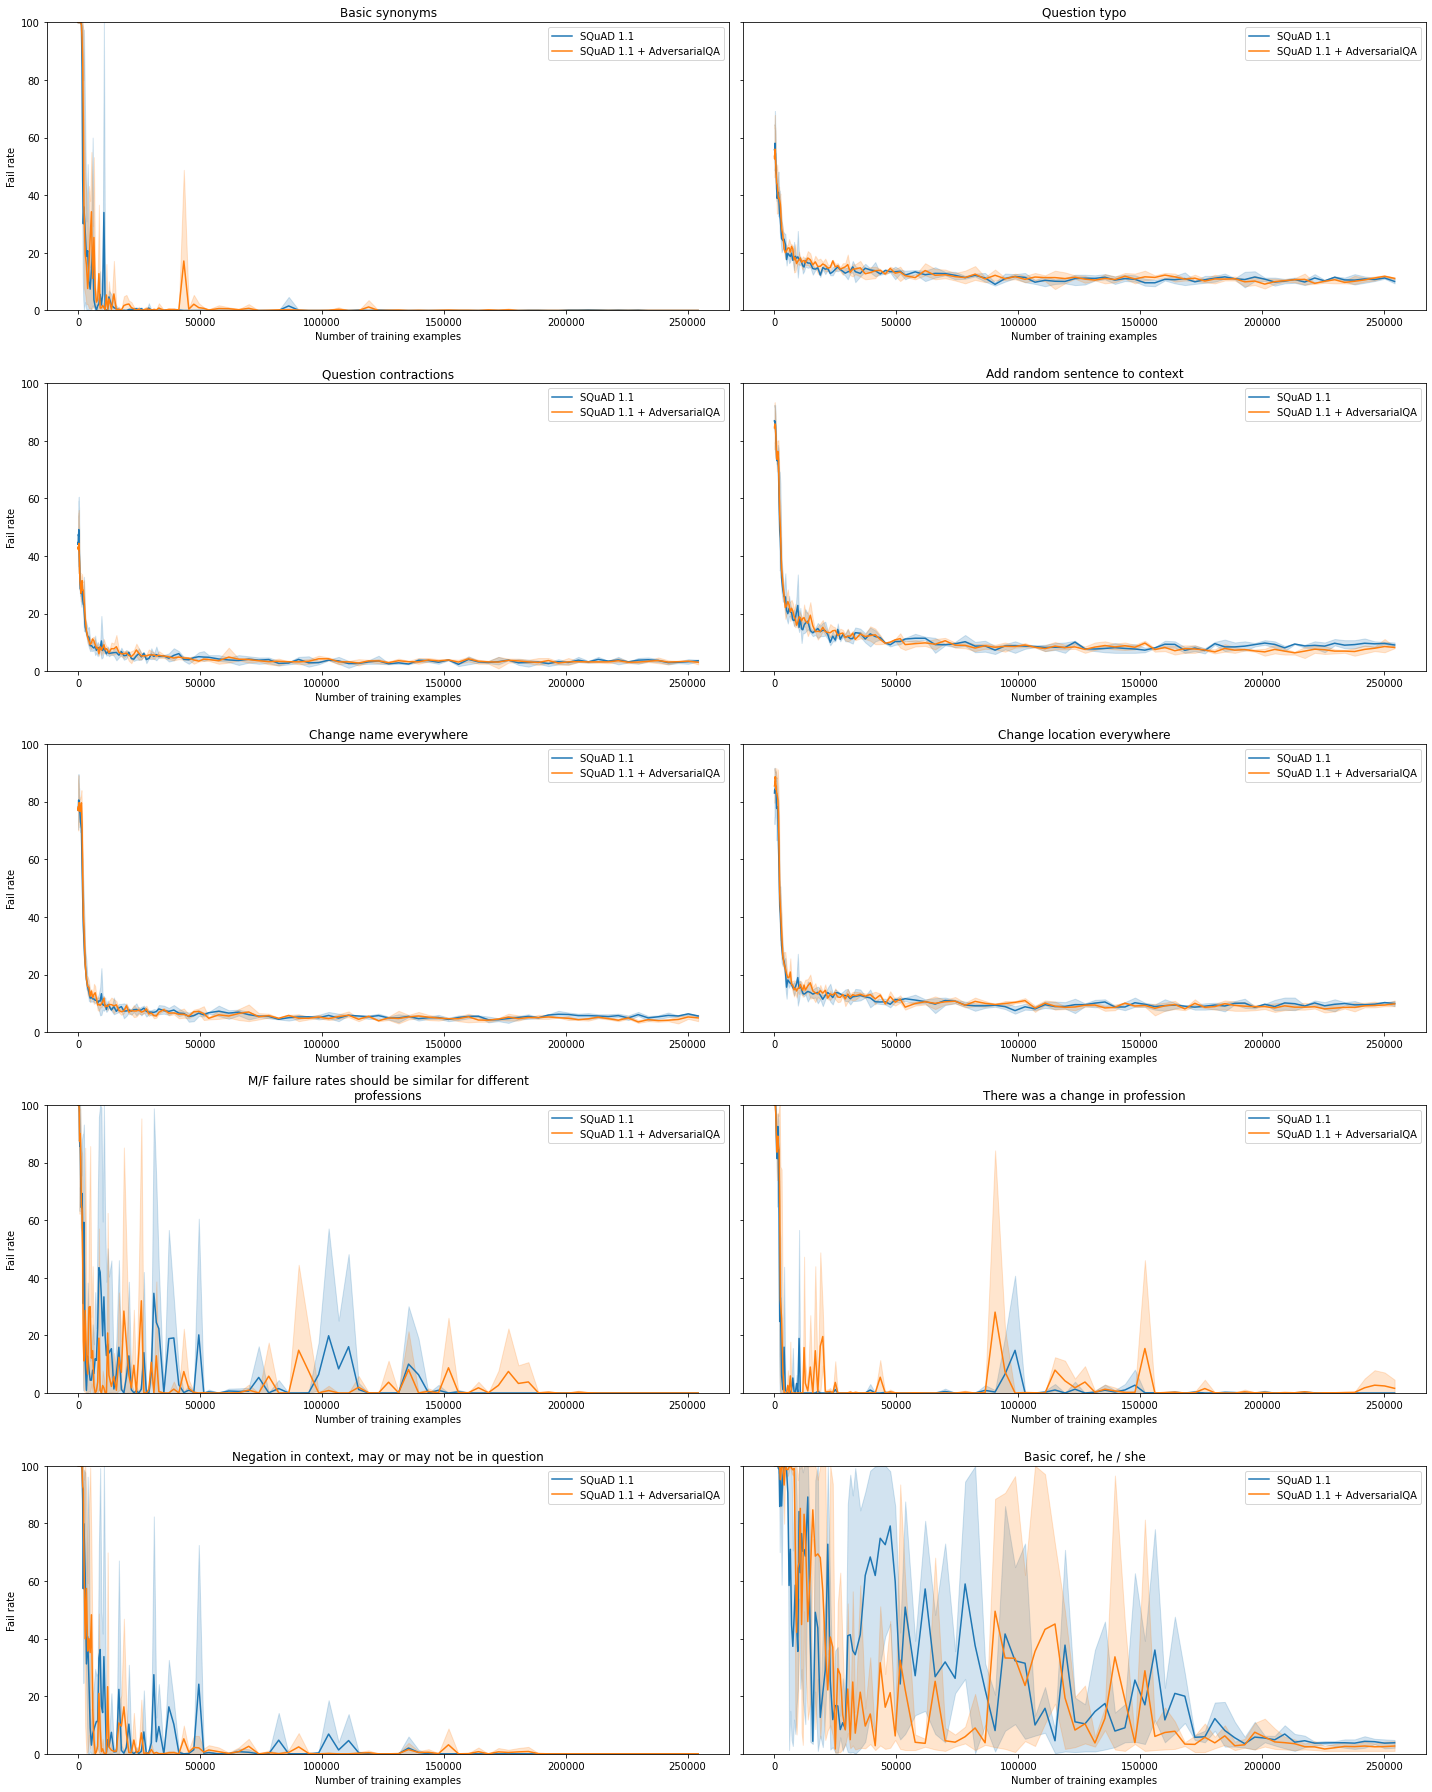

In [21]:
CATEGORIES = [
    'Basic synonyms',
    'Question typo',
    'Question contractions',
    'Add random sentence to context',
    'Change name everywhere',
    'Change location everywhere',
    'M/F failure rates should be similar for different professions',
    'There was a change in profession',
    'Negation in context, may or may not be in question',
    'Basic coref, he / she'
]

fig, axs = plt.subplots(5, 2, sharey=True, figsize=(20, 25))

idx_x, idx_y = 0, 0

for i, test_name in enumerate(CATEGORIES):

    plot_df = checklist_df.copy()[checklist_df['test_name'] == test_name]

    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='fail_rate', hue='model', data=plot_df, ax=axs[idx_x, idx_y], hue_order=['SQuAD 1.1', 'SQuAD 1.1 + AdversarialQA'])

    axs[idx_x, idx_y].set_title("\n".join(wrap(f"{test_name}", 50)))
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Fail rate')
    axs[idx_x, idx_y].legend()

    if (i % 2 == 0):
        idx_y += 1
    else:
        idx_y -= 1
        idx_x += 1

if len(CATEGORIES) % 2 != 0:
    axs[idx_x, idx_y].axis('off')  # Blank for missing axis
        
plt.tight_layout()
plt.savefig('reports/figures/checklist-by-test-name-category1.pdf')
plt.show()

### Poor overall performance for both models

In [ ]:
CATEGORIES = [
    'Intensifiers (very, super, extremely) and reducers (somewhat, kinda, etc)?',
    'Profession vs nationality',
    'Former / Latter',
    'Agent / object distinction'
]

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(20, 10))

idx_x, idx_y = 0, 0

for i, test_name in enumerate(CATEGORIES):

    plot_df = checklist_df.copy()[checklist_df['test_name'] == test_name]

    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='fail_rate', hue='model', data=plot_df, ax=axs[idx_x, idx_y], hue_order=['SQuAD 1.1', 'SQuAD 1.1 + AdversarialQA'])

    axs[idx_x, idx_y].set_title("\n".join(wrap(f"{test_name}", 50)))
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Fail rate')
    axs[idx_x, idx_y].legend()

    if (i % 2 == 0):
        idx_y += 1
    else:
        idx_y -= 1
        idx_x += 1

if len(CATEGORIES) % 2 != 0:
    axs[idx_x, idx_y].axis('off')  # Blank for missing axis
        
plt.tight_layout()
plt.savefig('reports/figures/checklist-by-test-name-category2.pdf')
plt.show()

### Model fine-tuned on combination of datasets outperforms model trained on SQuAD 1

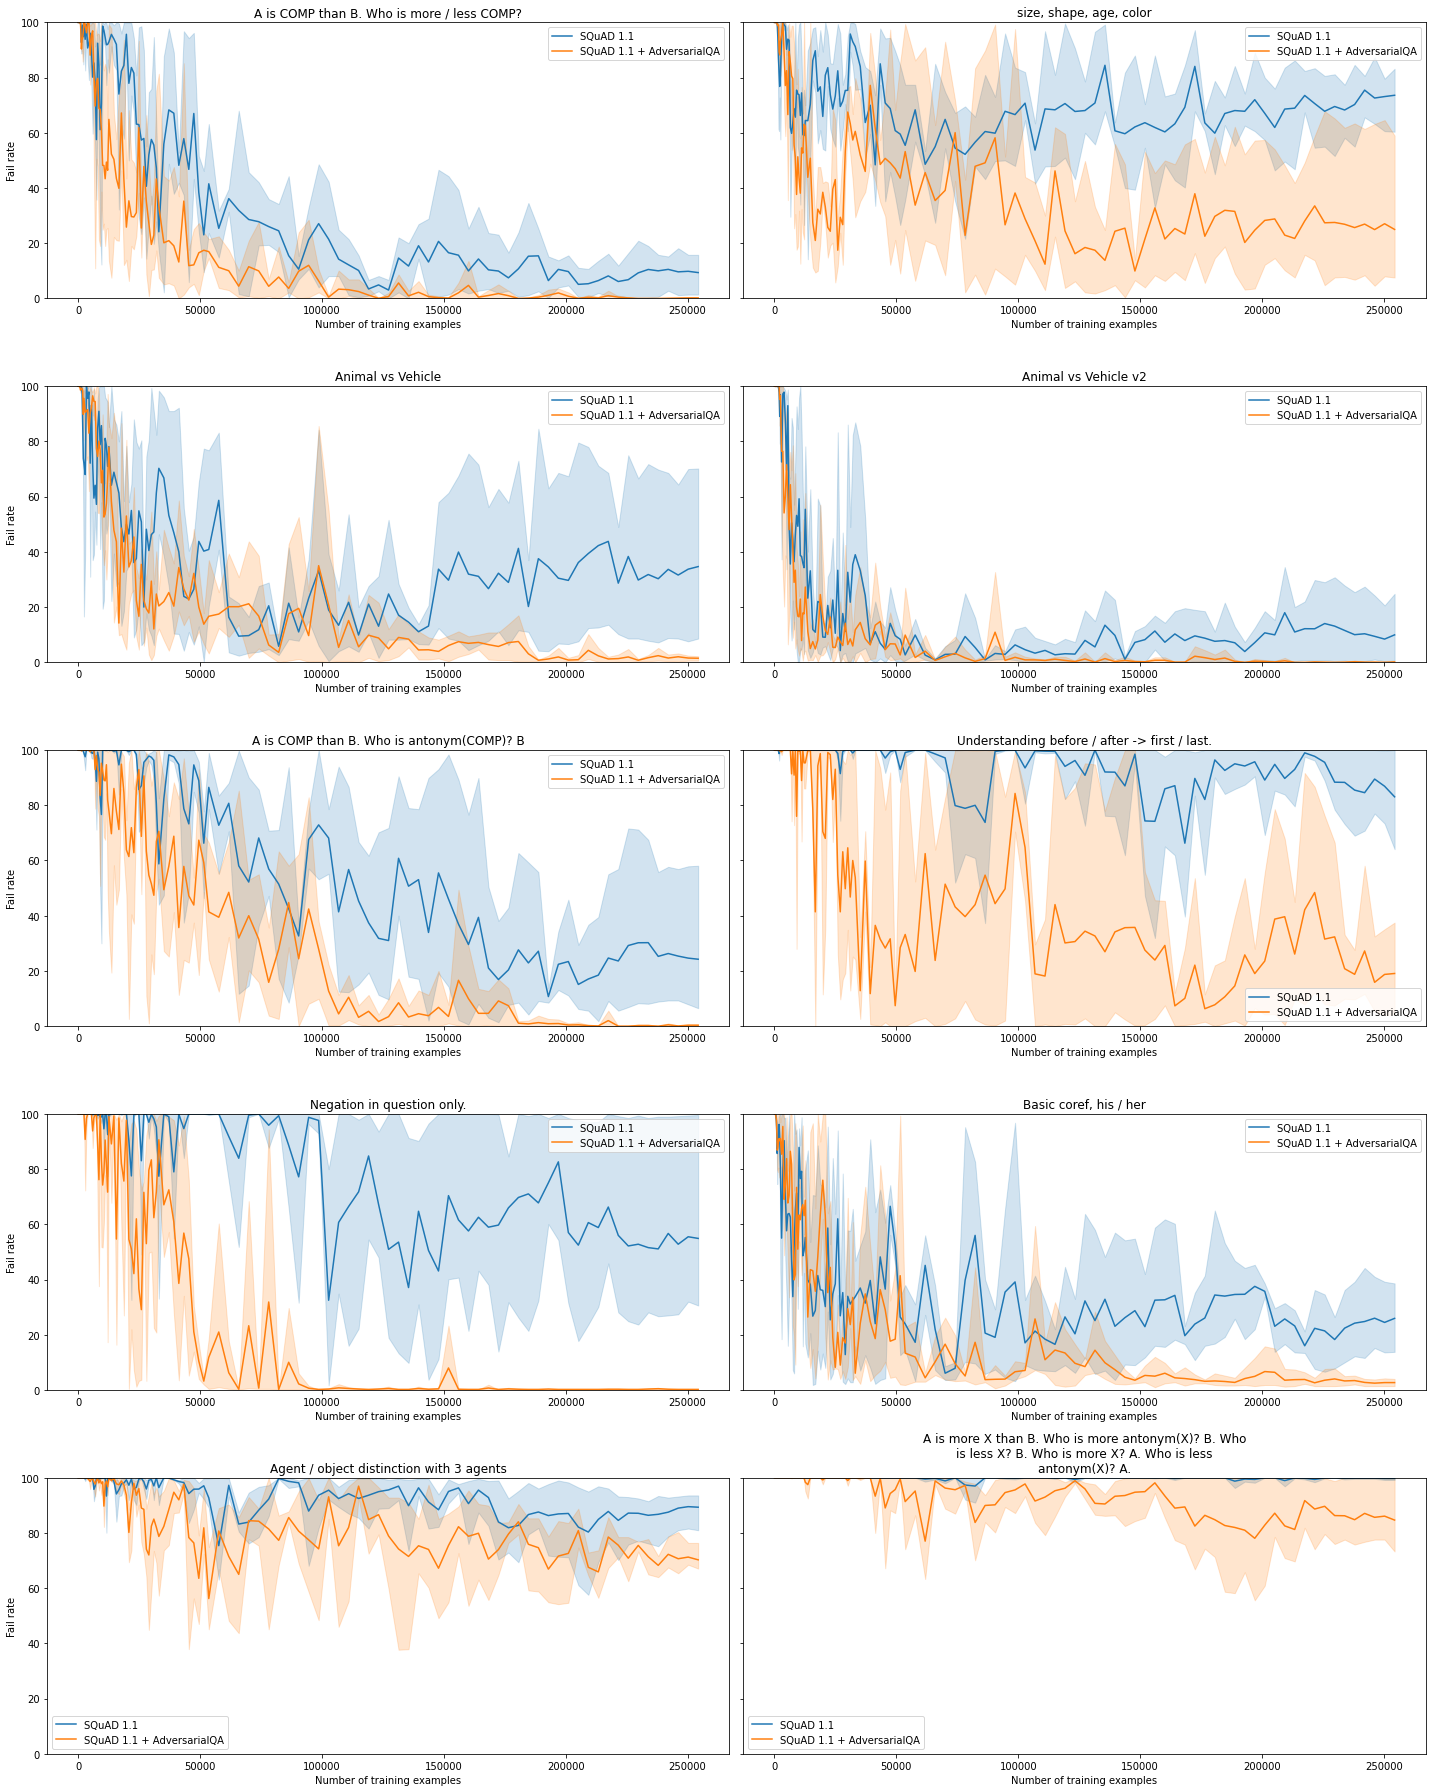

In [23]:
CATEGORIES = [
    'A is COMP than B. Who is more / less COMP?',
    'size, shape, age, color',
    'Animal vs Vehicle',
    'Animal vs Vehicle v2',
    'A is COMP than B. Who is antonym(COMP)? B',
    'Understanding before / after -> first / last.',
    'Negation in question only.',
    'Basic coref, his / her',
    'Agent / object distinction with 3 agents',
    'A is more X than B. Who is more antonym(X)? B. Who is less X? B. Who is more X? A. Who is less antonym(X)? A.'
]

fig, axs = plt.subplots(5, 2, sharey=True, figsize=(20, 25))

idx_x, idx_y = 0, 0

for i, test_name in enumerate(CATEGORIES):

    plot_df = checklist_df.copy()[checklist_df['test_name'] == test_name]

    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='fail_rate', hue='model', data=plot_df, ax=axs[idx_x, idx_y], hue_order=['SQuAD 1.1', 'SQuAD 1.1 + AdversarialQA'])

    axs[idx_x, idx_y].set_title("\n".join(wrap(f"{test_name}", 50)))
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Fail rate')
    axs[idx_x, idx_y].legend()

    if (i % 2 == 0):
        idx_y += 1
    else:
        idx_y -= 1
        idx_x += 1

if len(CATEGORIES) % 2 != 0:
    axs[idx_x, idx_y].axis('off')  # Blank for missing axis
        
plt.tight_layout()
plt.savefig('reports/figures/checklist-by-test-name-category3.pdf')
plt.show()